#Regresión Lineal simple

Supóngase que un analista de deportes quiere saber si existe una relación entre el número de veces que batean los jugadores de un equipo de béisbol y el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido

In [3]:
#Tratamiento de datos
import pandas as pd
import numpy as np
#Graficcos
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns

#Procesamiento y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Configuracion matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] ="tight"
style.use('ggplot') or plt.style.use('ggplot')
#configure warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
#Datos
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})

Text(0.5, 1.0, 'Distribucion de bateos y runs')

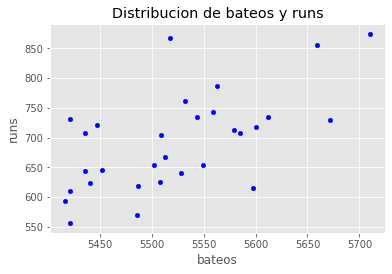

In [6]:
#representacion Grafica
fig,ax = plt.subplots(figsize=(6,3.84))
datos.plot(
    x = 'bateos',
    y = 'runs',
    c = 'blue',
    kind ="scatter",
    ax =ax
)
ax.set_title('Distribucion de bateos y runs')

In [8]:
#Correlación lineal entre las dos variables
corr_test = pearsonr(x = datos['bateos'], y = datos['runs'])
print("Coeficientes de correlacion de pearson:", corr_test[0])
print("P_value: ", corr_test[1])

Coeficientes de correlacion de pearson: 0.6106270467206688
P_value:  0.0003388351359791963


In [9]:
#Division de los datos en train y test
X= datos[['bateos']]
y = datos['runs']
X_train, X_test, y_train, y_test = train_test_split(
    X.values.reshape(-1,1),
    y.values.reshape(-1,1),
    train_size = 0.8,
    random_state = 1234,
    shuffle = True
)

In [10]:
#Creacion del modelo
modelo = LinearRegression()
modelo.fit(X= X_train.reshape(-1,1), y = y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
#Información del modelo
print("Intercepciones: ", modelo.intercept_)
print("Coeficientes :",list(zip(X.columns, modelo.coef_.flatten(),)))
print("Coeficientes de entrenamiento R^2:", modelo.score(X,y))

Intercepciones:  [-2367.7028413]
Coeficientes : [('bateos', 0.5528713534479736)]
Coeficientes de entrenamiento R^2: 0.35861198994987437


Una vez entreanado el modelo, se evalúa la capacidad  predictiva empleando el conjunto de test

In [13]:
predicciones = modelo.predict(X= X_test)
print(predicciones[0:3,])
rmse = mean_squared_error(
    y_true = y_test,
    y_pred = predicciones,
    squared = False
)
print("")
print(f"El error (rmse) de test es :{rmse}")

[[643.78742093]
 [720.0836677 ]
 [690.78148597]]

El error (rmse) de test es :59.336716083360486




La columna (coef) devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal $(β^0 $y $β^1$ ) que equivalen a la ordenada en el origen (intercept o const) y a la pendiente. Se muestran también los errores estándar, el valor del estadístico t y el p-value (dos colas) de cada uno de los dos parámetros. Esto permite determinar si los predictores son significativamente distintos de 0, es decir, que tienen importancia en el modelo. Para el modelo generado, tanto la ordenada en el origen como la pendiente son significativas (p-values < 0.05).

El valor de R-squared indica que el modelo es capaz de explicar el $27.1%$ de la variabilidad observada en la variable respuesta (runs). Además, el p-value obtenido en el test $F (Prob (F-statistic) = 0.00906)$ indica que sí hay evidencias de que la varianza explicada por el modelo es superior a la esperada por azar (varianza total).

El modelo lineal generado sigue la ecuación:
$$runs = -2367.7028 + 0.6305$$ bateos

Por cada unidad que se incrementa el número de bateos, el número de runs aumenta en promedio 0.6305 unidades.

El error de test del modelo es de 59.34. Las predicciones del modelo final se alejan en promedio 59.34 unidades del valor real. 